In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("dataset/iris.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset['species'].value_counts()
#0 -> setosa
#1 - versicolor
#2 -> virginica

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
dataset['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

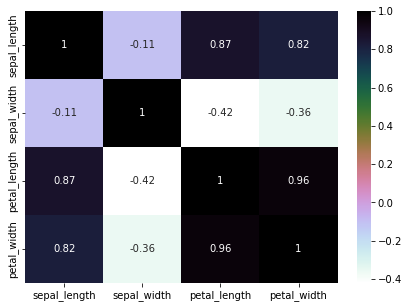

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# Splitting the dataset

In [9]:
X = dataset.drop(['species'], axis=1)
y = dataset['species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Classification Methods

## 1. Decision Tree Classification

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 96.67%


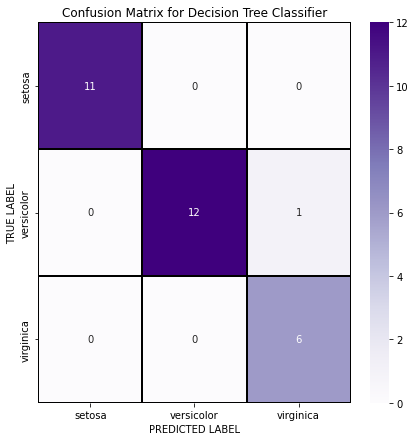

In [13]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["setosa", "versicolor", "virginica"]
y_axis_labels = ["setosa", "versicolor", "virginica"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 2. Random Forest Classification

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 96.67%


In [15]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



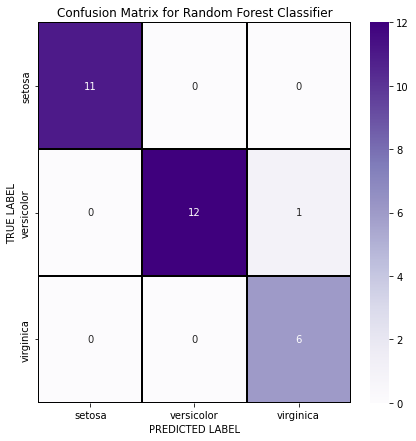

In [16]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["setosa", "versicolor", "virginica"]
y_axis_labels = ["setosa", "versicolor", "virginica"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

## 3. Naive Bayes Classification

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 96.67%


In [18]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



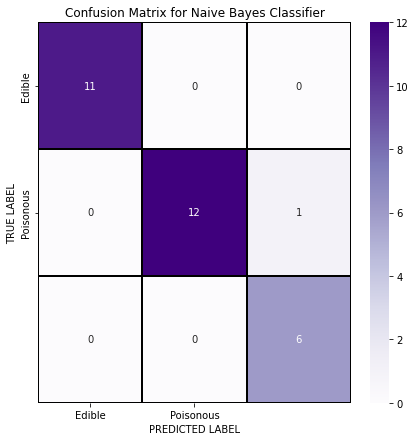

In [19]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# Prediction

In [25]:
decision_tree_preds = dt.predict(X_test)
random_forest_preds = rf.predict(X_test)
naive_bias_preds = nb.predict(X_test)

print("Decision Tree:")
print(decision_tree_preds)
print("Random Foresr")
print(random_forest_preds)
print("Naive Bias")
print(naive_bias_preds)

Decision Tree:
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica']
Random Foresr
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica']
Naive Bias
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'set